# Example - 56 - Titan Aerocapture Systems Study - Part 2

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy import interpolate
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
planet = Planet('TITAN')
planet.loadAtmosphereModel('../atmdata/Titan/titan-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 1000.0E3

In [4]:
vehicle=Vehicle('TitanAC', 818.0, 90.0, 0.25, np.pi*0.25*3.75**2, 0.0, 0.91, planet)
vehicle.setInitialState(1000.0,0.0,0.0,6.5,0.0,-36.00,0.0,0.0)
vehicle.setSolverParams(1E-6)

In [5]:
vehicle.propogateEntry (4.5*60.0,1.0,0.0)

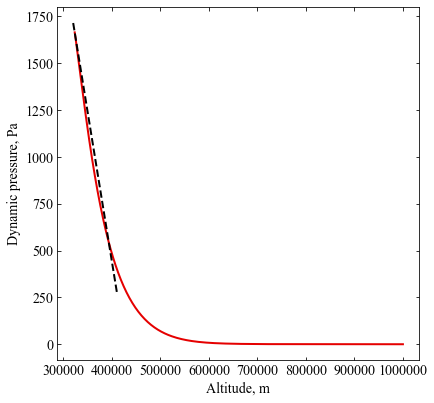

In [6]:
fig = plt.figure()
fig.set_size_inches([6.5,6.5])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.plot(vehicle.h_kmc*1E3 , vehicle.dyn_pres_atm*1.01325E5, linestyle='solid' , color='xkcd:red',linewidth=2.0)


plt.xlabel("Altitude, m",fontsize=14)
plt.ylabel('Dynamic pressure, Pa',fontsize=14)

ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)


x_arr = np.linspace(320.0E3,410.0E3,101)
a = -0.0159471
b =  6817.29
y_arr = a*x_arr + b

plt.plot(x_arr,y_arr,'k-',linewidth=2.0,linestyle='dashed')

plt.show()


In [22]:
np.array([vehicle.h_kmc[-1]*1E3  , vehicle.dyn_pres_atm[-1]*1.01325E5])

array([323152.88452549,   1664.36366336])

In [26]:
np.array([vehicle.h_kmc[-60]*1E3  , vehicle.dyn_pres_atm[-60]*1.01325E5])

array([393570.59594583,    541.95830742])

In [31]:
(541.95830742-1664.36366336)/(393570.59594583-323152.88452549)

-0.015939247858256803

In [37]:
0.05**2*(90/0.25)*(1/0.01593924)

56.46442364880635

In [38]:
2*1.5*0.05*(90/0.25)

54.00000000000001

In [45]:
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 56
# Set Gq = 54
# Set v_switch_kms = 0.5 
# Set low_Alt_km = 100
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -300 m/s
vehicle.setEquilibriumGlideParams(56.0, 54.0, 0.5, 100.0, 101, -1000.0)

# Set target orbit parameters
# periapsis = 1700.0 km
# apoapsis = 1700 km
# apoapsis tolerance = 50 km
vehicle.setTargetOrbitParams(1700.0E3, 1700.0E3, 50.0E3)

In [29]:
# Set path to atmfiles with randomly perturbed atmosphere files.

atmfiles = ['../atmdata/Titan/FMINMAX-10.txt', 
            '../atmdata/Titan/FMINMAX-08.txt',
            '../atmdata/Titan/FMINMAX-06.txt',  
            '../atmdata/Titan/FMINMAX-04.txt',
            '../atmdata/Titan/FMINMAX-02.txt',
            '../atmdata/Titan/FMINMAX+00.txt',  
            '../atmdata/Titan/FMINMAX+02.txt',
            '../atmdata/Titan/FMINMAX+04.txt',
            '../atmdata/Titan/FMINMAX+06.txt',
            '../atmdata/Titan/FMINMAX+08.txt', 
            '../atmdata/Titan/FMINMAX+10.txt']

In [46]:
# Set up Monte Carlo simulation parameters

# See function description for details.

# NPOS = 201
# NMONTE = 200

vehicle.setupMonteCarloSimulation(201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -36.00, 0.33, 0.25, 0.01, 10.0, 1.0, 60.0*60.0) 

In [47]:
vehicle.runMonteCarlo(5, '../data/titan-systems/MCB17') 

KeyboardInterrupt: 